MODEL_SCORE: 0.9159706972434531
R2_SCORE: 0.9468491946791753
Value 1:  0.6
Value 2:  30.45
Value 3:  66.12
Value 4:  114.19
Fields updated to: {'field1': 143.94958914966088}


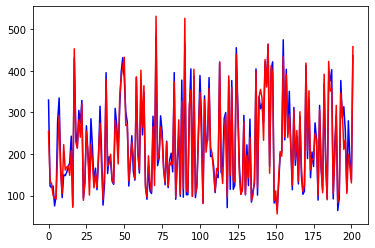

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
df=pd.read_excel('AQI_data.xlsx')

nullvalues = df.isnull().sum().sort_values(ascending=False)

df.drop(['Date'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)
df.drop(['AQI_Bucket'],axis=1,inplace=True)
from sklearn.svm import SVR

data = df

x = data.iloc[:, 0:12].values 
y = data.iloc[:, 12].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
model = SVR(kernel='linear')

# Fitting the SVR model to the data
model.fit(x_train, y_train)
# Predicting the target values of the test set
y_pred = model.predict(x_test)


plt.plot(y_test,color="blue")
plt.plot(y_pred,color="red")
print("MODEL_SCORE:",model.score(x,y))
print("R2_SCORE:",r2_score(y_test,y_pred))
def AQIvalue(CO,O3,pm25,pm10):
    a=[[pm25,pm10,23.12,27.52,18.35,34.54,CO,7.13,O3,0.25,1.38,0.13]]
    arr = np.array(a)
    prediction=model.predict(arr)
    return prediction
import requests

# Enter your ThingSpeak channel URL and API key
channel_url = "https://api.thingspeak.com/channels/1987059/fields/"
api_key = "JCOCTVDU3KOVZC2B"

# Enter the field numbers you want to retrieve data from
field_numbers = [1, 2, 3, 4]

# Create the API URL for the selected fields
api_url = channel_url + ','.join([str(field) for field in field_numbers]) + ".json?api_key=" + api_key

# Send an HTTP GET request to the ThingSpeak API
response = requests.get(api_url)

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    json_data = response.json()

    # Check if there are any feeds in the response
    if len(json_data['feeds']) > 0:
        # Extract the 4 values from the latest feed in the response
        latest_feed = json_data['feeds'][-1]
        value1 = latest_feed.get('field1')
        value2 = latest_feed.get('field2')
        value3 = latest_feed.get('field3')
        value4 = latest_feed.get('field4')

        # Print the 4 values
        print("Value 1: ", value1)
        print("Value 2: ", value2)
        print("Value 3: ", value3)
        print("Value 4: ", value4)
    else:
        print("No feeds found in ThingSpeak channel")
else:
    print("Error fetching data from ThingSpeak API")

outValue=AQIvalue(value1,value2,value3,value4)
import requests
# Enter your ThingSpeak channel URL and API key
channel_url = "https://api.thingspeak.com/update"
api_key = "UJJ72IK37Y5K2F93"

# Enter the field numbers and values you want to update
field_values = {"field1": outValue[0] }

# Create the payload for the POST request
payload = {'api_key': api_key}
for field, value in field_values.items():
    payload[field] = str(value)

# Send the POST request to the ThingSpeak API
response = requests.post(channel_url, params=payload)

# Check if the response was successful
if response.status_code == 200:
    print("Fields updated to:", field_values)
else:
    print("Error updating ThingSpeak fields")

from IPython.display import HTML

with open("untitled.html", "r") as f:
    html = f.read()

HTML(html)



In [6]:
from IPython.display import HTML

with open("untitled.html", "r") as f:
    html = f.read()

HTML(html)

143.94958914966088